# Loading input from Dataset

In [1]:
pwd

'C:\\Users\\singh'

In [1]:
import os

In [2]:
path='C:\\Users\\singh'

In [3]:
#data = os.listdir(path="datafm")

In [4]:
data_path='datafm'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [5]:
import cv2
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'

Exception: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'



In [6]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [7]:

np.save('data',data)
np.save('target',new_target)

In [8]:

data=np.load('data.npy')
target=np.load('target.npy')

# Building the Deep Learning Model

In [9]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.save('model-1.model')

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [11]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 79s 80ms/step - loss: 0.7525 - accuracy: 0.5202 - val_loss: 0.6499 - val_accuracy: 0.6492
Epoch 2/20
990/990 [==============================] - 77s 77ms/step - loss: 0.6045 - accuracy: 0.6717 - val_loss: 0.5231 - val_accuracy: 0.7621
Epoch 3/20
990/990 [==============================] - 76s 77ms/step - loss: 0.4167 - accuracy: 0.8253 - val_loss: 0.3285 - val_accuracy: 0.8387
Epoch 4/20
990/990 [==============================] - 73s 74ms/step - loss: 0.3084 - accuracy: 0.8788 - val_loss: 0.3223 - val_accuracy: 0.8387
Epoch 5/20
990/990 [==============================] - 82s 83ms/step - loss: 0.2685 - accuracy: 0.9020 - val_loss: 0.2992 - val_accuracy: 0.9073
Epoch 6/20
990/990 [==============================] - 96s 97ms/step - loss: 0.2105 - accuracy: 0.9242 - val_loss: 0.2019 - val_accuracy: 0.9153
Epoch 7/20
990/990 [==============================] - 96s 97ms/step - loss: 0.1772 - accur

# Results:

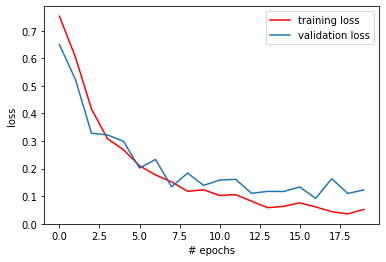

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

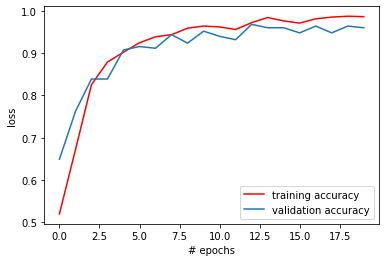

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 5s 35ms/step
[0.17557063561094843, 0.9420289993286133]


# Face detection: 


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('model-1.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [28]:
import cv2

cap = cv2.VideoCapture(0);

w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

fourcc = cv2.VideoWriter_fourcc(*'SVID')
out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))

print(cap.isOpened(),": The camera is ON")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        out.write(frame) 
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',gray)
    
        if cv2.waitKey(1) == ord('p'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

True : The camera is ON


# Face Mask Detection

In [ ]:
# Test 2
from keras.models import load_model
import cv2
import numpy as np
model = load_model('model-3.model')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#video = 'vid.mp4'
cap = cv2.VideoCapture(0);

w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

#fourcc = cv2.VideoWriter_fourcc(*'SVID')
#out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))

print(cap.isOpened(),": The camera is ON")
while(cap.isOpened()):
    ret, img = cap.read()
    if ret == True:
        #out.write(frame) 
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray, 1.2,3)
        
        for (x, y, w, h) in faces:
            
            face_img=gray[y:y+w,x:x+w]
            resized=cv2.resize(face_img,(100,100))
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(1,100,100,1))
            result=model.predict(reshaped)
            label=np.argmax(result,axis=1)[0]
      
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
            cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
            cv2.imshow('frame',img)
    
        if cv2.waitKey(1) == ord('p'):
            break
    else:
        break

cap.release()
#out.release()
cv2.destroyAllWindows()
